<a href="https://colab.research.google.com/github/Ayakhaled200/Projects/blob/main/Tempreture_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 1  
##Analyse Average temperature in each season (EDA)
## - Done on GlobalTemperatures Dataset

##Importing Liberaries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##Reading Data from Device

In [ ]:
import pandas as pd
from google.colab import files

# Upload the file from your local device
uploaded = files.upload()

# Iterate over the uploaded files
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

    # Read the file into a pandas DataFrame
    df = pd.read_csv(filename)

# Display the first few rows of the DataFrame
print(df.head())

Saving GlobalTemperatures.csv to GlobalTemperatures (1).csv
Uploaded file: GlobalTemperatures (1).csv
           dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN         

In [ ]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


##Data Cleaning

###Duplicate rows

In [ ]:
df.duplicated().sum()  #no duplicated observed

0

###Data type of each feature is correct or not?

In [ ]:
df.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [ ]:
df['dt'][0]   #string nature but should be in a date-time fromate

'1750-01-01'

In [ ]:
df['dt'] = pd.to_datetime(df['dt'])

In [ ]:
#formate should be datetime64[n.s] or MB[n.s]
df['dt'].dtype

dtype('<M8[ns]')

In [ ]:
df['dt'][0]

Timestamp('1750-01-01 00:00:00')

##EDA

###First 3 featres i need are
- years
- Avg land temperature
- Avg Deviation in land temperature  

In [ ]:
df['years'] = df['dt'].dt.year

In [ ]:
df.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750


##### LandAverageTemperature => Avg land temperature
##### LandAverageTemperatureUncertainty => Avg Deviation in land temperature
#####Uncertainty is all about the deviation

In [ ]:
df.groupby('years').agg({'LandAverageTemperature': 'mean', 'LandAverageTemperatureUncertainty': 'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


### i also need Max_uncer. which is
- Avg temp + dev
### Min_uncer.
- Avg temp - dev


In [ ]:
data = df.groupby('years').agg({'LandAverageTemperature': 'mean', 'LandAverageTemperatureUncertainty': 'mean'}).reset_index() #store it as df in data using reset_index

In [ ]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250
...,...,...,...
261,2011,9.516000,0.082000
262,2012,9.507333,0.083417
263,2013,9.606500,0.097667
264,2014,9.570667,0.090167


In [ ]:
data['Uncertainty_top'] = data['LandAverageTemperature'] + data ['LandAverageTemperatureUncertainty']
data['Uncertainty_bottom'] = data['LandAverageTemperature'] - data ['LandAverageTemperatureUncertainty']

In [ ]:
data

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty_top,Uncertainty_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083
...,...,...,...,...,...
261,2011,9.516000,0.082000,9.598000,9.434000
262,2012,9.507333,0.083417,9.590750,9.423917
263,2013,9.606500,0.097667,9.704167,9.508833
264,2014,9.570667,0.090167,9.660833,9.480500


In [ ]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'],
      dtype='object')

<Axes: xlabel='years'>

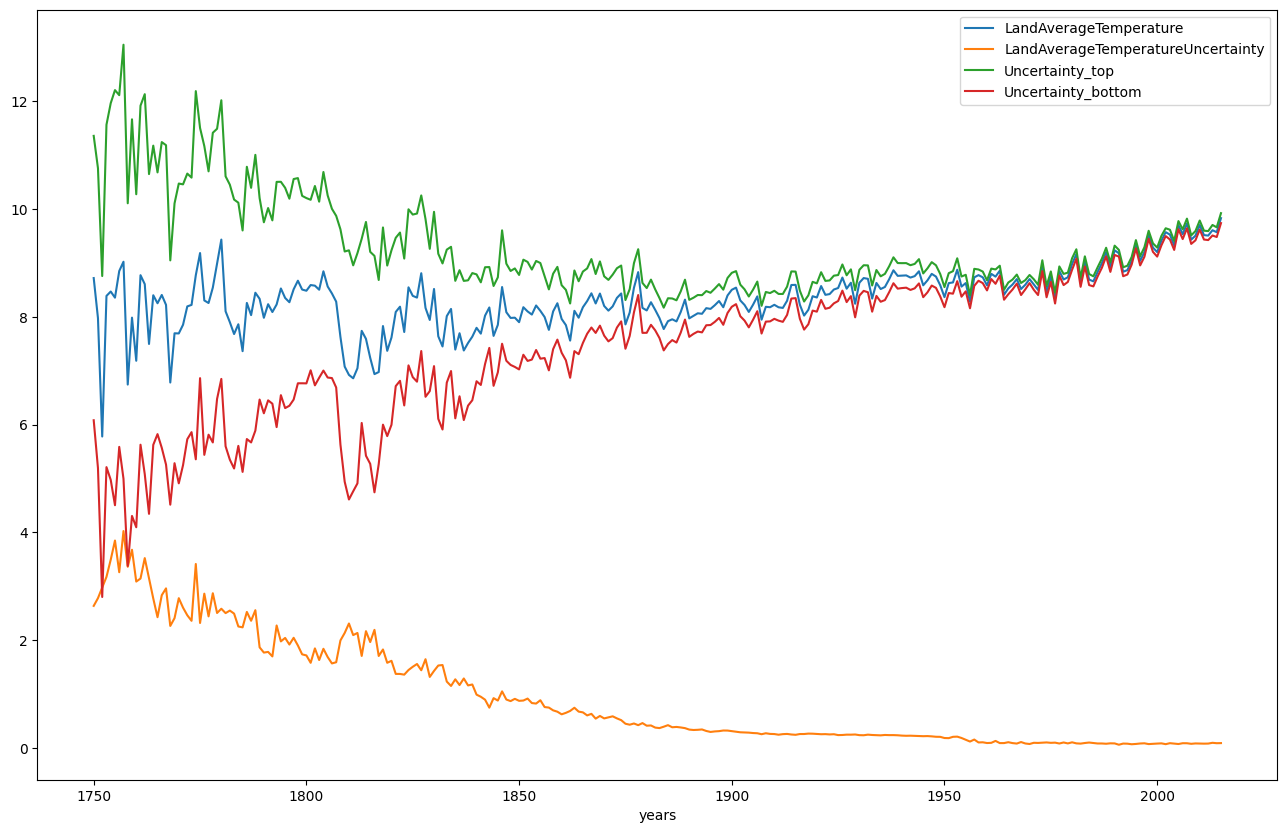

In [24]:
#Multi Line plot for all my featurea

data.plot(x = 'years', y = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty_top', 'Uncertainty_bottom'], figsize= (16,10))

In [26]:
df.columns  #no season feauture

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years', 'month'],
      dtype='object')

In [25]:
df['month'] = df['dt'].dt.month

In [27]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [28]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [29]:
def get_season (month):
  if month >= 3 and month <= 5:
    return 'spring'
  if month >= 6 and month <= 8:
    return 'summer'
  if month >= 9 and month <= 11:
    return 'autumn'
  else:
    return 'winter'

In [30]:
df['month'].apply(get_season)

0       winter
1       winter
2       spring
3       spring
4       spring
         ...  
3187    summer
3188    autumn
3189    autumn
3190    autumn
3191    winter
Name: month, Length: 3192, dtype: object

In [31]:
df['season'] = df['month'].apply(get_season)

In [32]:
df.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'years', 'month',
       'season'],
      dtype='object')

lets say i have a data of 300 years, extract each and every year one by one,
lets say i have data for 1741,
- let's find out the whole data (all observations) where my season is spring.
- lets compute the mean temperature of spring.
- etc for all the seasons

In [33]:
years = df['years'].unique()

In [34]:
df['season'].unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

In [36]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []

for year in years: #filter that gives me the entire df of a particular year
  current_year = df[df['years'] == year]
  spring_temp.append(current_year[current_year['season']  == 'spring']['LandAverageTemperature'].mean()) #filter that gives me the entire df of a spring of that particular year
                                                            # this will give me the avg temp. of that spring
  summer_temp.append(current_year[current_year['season']  == 'summer']['LandAverageTemperature'].mean())
  autumn_temp.append(current_year[current_year['season']  == 'autumn']['LandAverageTemperature'].mean())
  winter_temp.append(current_year[current_year['season']  == 'winter']['LandAverageTemperature'].mean())





In [37]:
season = pd.DataFrame()

In [38]:
season['years'] = years
season['spring_temp'] = spring_temp
season['summer_temp'] = summer_temp
season['autumn_temp'] = autumn_temp
season['winter_temp'] = winter_temp


In [39]:
season

,years,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333
...,...,...,...,...,...
261,2011,9.190000,14.954667,10.026000,3.893333
262,2012,9.429667,14.762667,10.208000,3.629000
263,2013,9.166667,14.771000,10.278000,4.210333
264,2014,9.516333,14.694333,10.044667,4.027333


In [41]:
season.columns

Index(['years', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

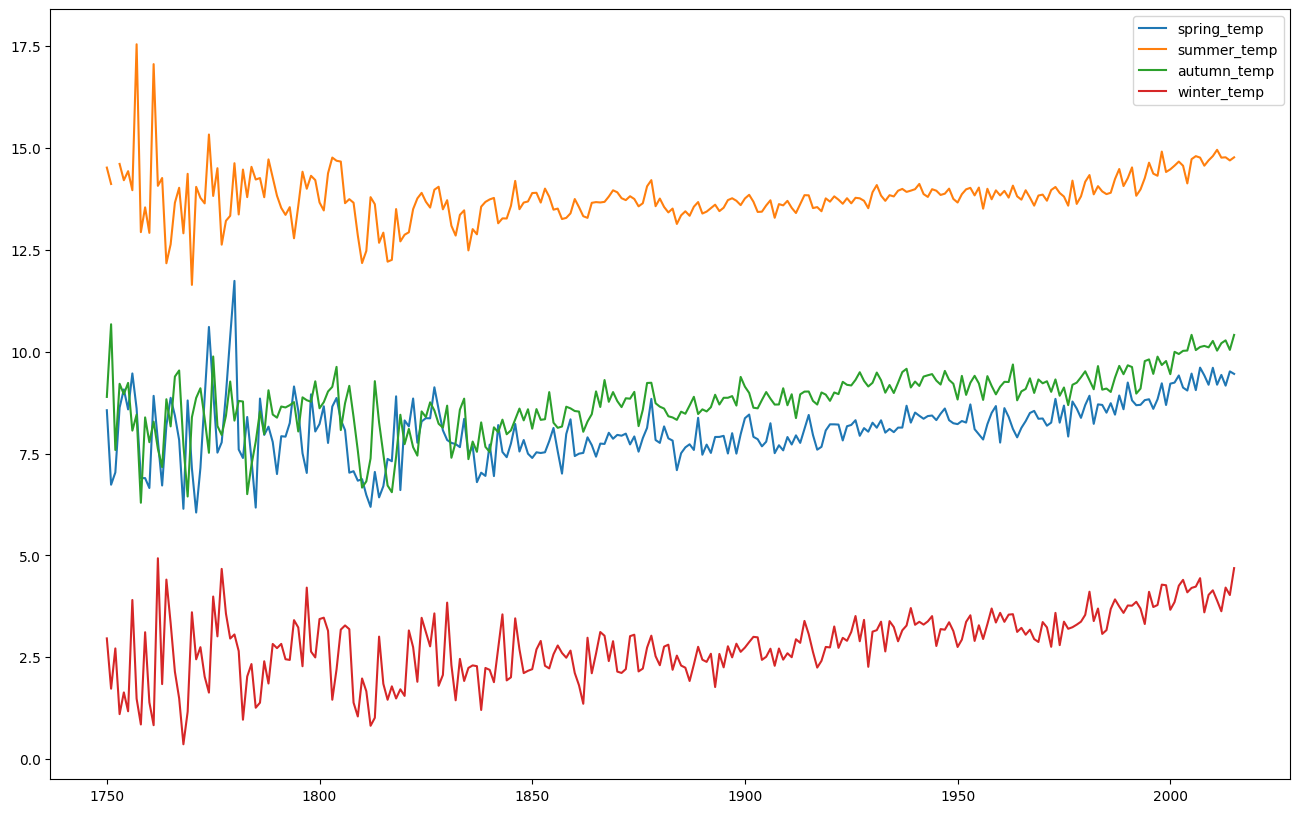

In [40]:
# data.plot(x = 'years', y = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
#        'Uncertainty_top', 'Uncertainty_bottom'], figsize= (16,10))
plt.figure(figsize = (16,10))
plt.plot(season['years'], season[['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp']])
plt.legend(['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'])

- ### it shows that the seasons are gitting warmer over years as avg temp. of seasons is rising

#Proplem Statement 2
##Prepare the data for time series Modeling
##Done on GlobalTemperaturesByCity Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###We have to predict what can be the temperature of a city on a particular date

###importing the liberaries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Reading the Data

In [7]:
# import pandas as pd
# from google.colab import files

# # Upload the file from your local device
# uploaded = files.upload()

# # Iterate over the uploaded files
# for filename in uploaded.keys():
#     print(f"Uploaded file: {filename}")

#     # Read the file into a pandas DataFrame
#     cities = pd.read_csv(filename)

# cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [8]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the directory where your CSV file is located
import os
os.chdir("/content/drive/MyDrive/DS/")

# Import pandas
import pandas as pd

# Read the CSV file
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cities.shape

(8599212, 7)

In [10]:
cities['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [11]:
usa = cities[cities['Country'] == 'United States']

In [12]:
usa.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [13]:
usa['City'].unique()

array(['Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allentown',
       'Amarillo', 'Anaheim', 'Anchorage', 'Ann Arbor', 'Antioch',
       'Arlington', 'Arvada', 'Atlanta', 'Aurora', 'Austin',
       'Bakersfield', 'Baltimore', 'Baton Rouge', 'Beaumont', 'Bellevue',
       'Berkeley', 'Birmingham', 'Boston', 'Bridgeport', 'Brownsville',
       'Buffalo', 'Burbank', 'Cambridge', 'Cape Coral', 'Carrollton',
       'Cary', 'Cedar Rapids', 'Chandler', 'Charleston', 'Charlotte',
       'Chattanooga', 'Chesapeake', 'Chicago', 'Chula Vista',
       'Cincinnati', 'Clarksville', 'Clearwater', 'Cleveland',
       'Colorado Springs', 'Columbia', 'Columbus', 'Concord',
       'Coral Springs', 'Corona', 'Corpus Christi', 'Costa Mesa',
       'Dallas', 'Dayton', 'Denton', 'Denver', 'Des Moines', 'Detroit',
       'Downey', 'Durham', 'East Los Angeles', 'Edison', 'El Monte',
       'El Paso', 'Elizabeth', 'Escondido', 'Eugene', 'Evansville',
       'Fairfield', 'Fayetteville', 'Flint', 'Fontana',

In [14]:
usa_cities = ['New York', 'Los Angeles', 'San Francisco'] #Filter

In [15]:
data2 = usa[usa['City'].isin(usa_cities)]

In [16]:
data2.shape

(7193, 7)

In [17]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [18]:
data2 = data2[['dt', 'AverageTemperature']]

In [19]:
data2.head(2)

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577


###Data Cleaning

####Changing columns names

In [20]:
data2.columns = ['Date','Temp']

In [21]:
data2

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834
...,...,...
6637248,2013-05-01,17.434
6637249,2013-06-01,19.759
6637250,2013-07-01,20.657
6637251,2013-08-01,19.731


####correcting Datatypes

In [22]:
data2.dtypes   #we have to convert date to datetime datatype

Date     object
Temp    float64
dtype: object

In [23]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [24]:
data2.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

####Dropping Nulls

In [25]:
data2.dropna(inplace = True)

####Making the Time Column the df index (as it's time series data)

In [26]:
#in time series usecase, date is your index
data2.set_index('Date', inplace = True)

In [27]:
data2.head(5)

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


#Problem Statement 3
##How to know that the data has seasonality or not

### if seasonality is avalible in our data, at any cost i have to convert this to a Stationary data
###Why? because time series algos, works very well if you have stationary data

###stationary data means that the mean and the variance are both constant throgh all the data while seasonality is the opposite

####Data -> trend (seasonality)

In [28]:
data2

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834
...,...
2013-05-01,17.434
2013-06-01,19.759
2013-07-01,20.657


In [29]:
data2['year'] = data2.index.year

In [30]:
data2['month'] = data2.index.month

In [31]:
data2

,Temp,year,month
Date,,,
1849-01-01,8.819,1849,1
1849-02-01,9.577,1849,2
1849-03-01,11.814,1849,3
1849-04-01,13.704,1849,4
1849-05-01,14.834,1849,5
...,...,...,...
2013-05-01,17.434,2013,5
2013-06-01,19.759,2013,6
2013-07-01,20.657,2013,7


In [32]:
pivot = data2.pivot_table(values = 'Temp', index = 'month', columns = 'year')

In [33]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


####here in this line chart we have seasonality, as every line chart is falling typically same type of trend.
####typically each and every year have same type trend.

Text(0, 0.5, 'Tempetature')

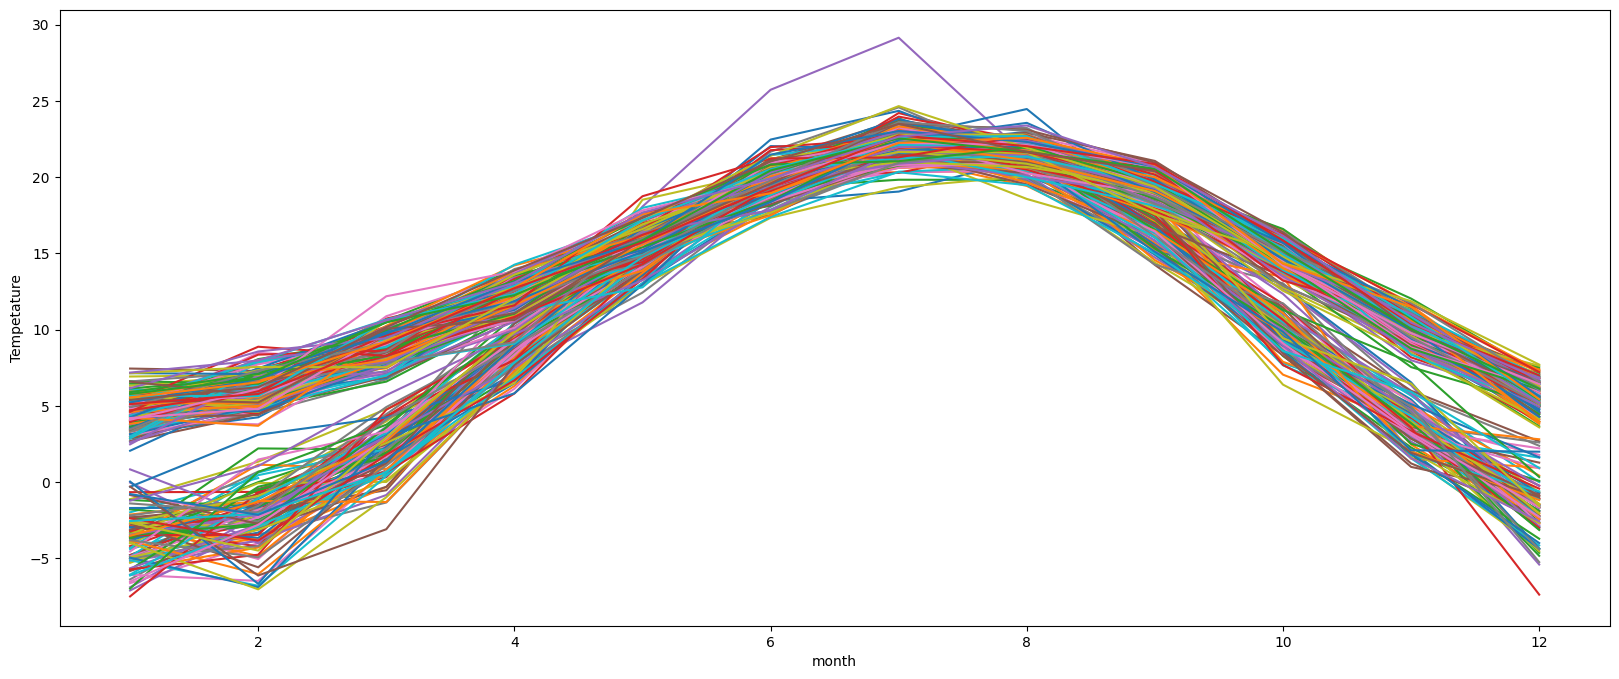

In [34]:
pivot.plot(figsize = (20,8))
plt.legend().remove()
plt.xlabel('month')
plt.ylabel('Tempetature')

###Once we figure out we have seasonality, we have to remove it.

#Problem Statement 4 :
##How to find out whether data is statinary or not

1- Data visualization:
- Ex: use a simple line plot.

2- simple descriptive statistics (Mean, Variance)

3- statistical test:
- (ADfuller test -ADF-) => P-value
- KPSS test

####Line chart indecat that the data has seasonal nature becaue the spread of the daya indicates there is a significant variation in the data.

<Axes: xlabel='Date'>

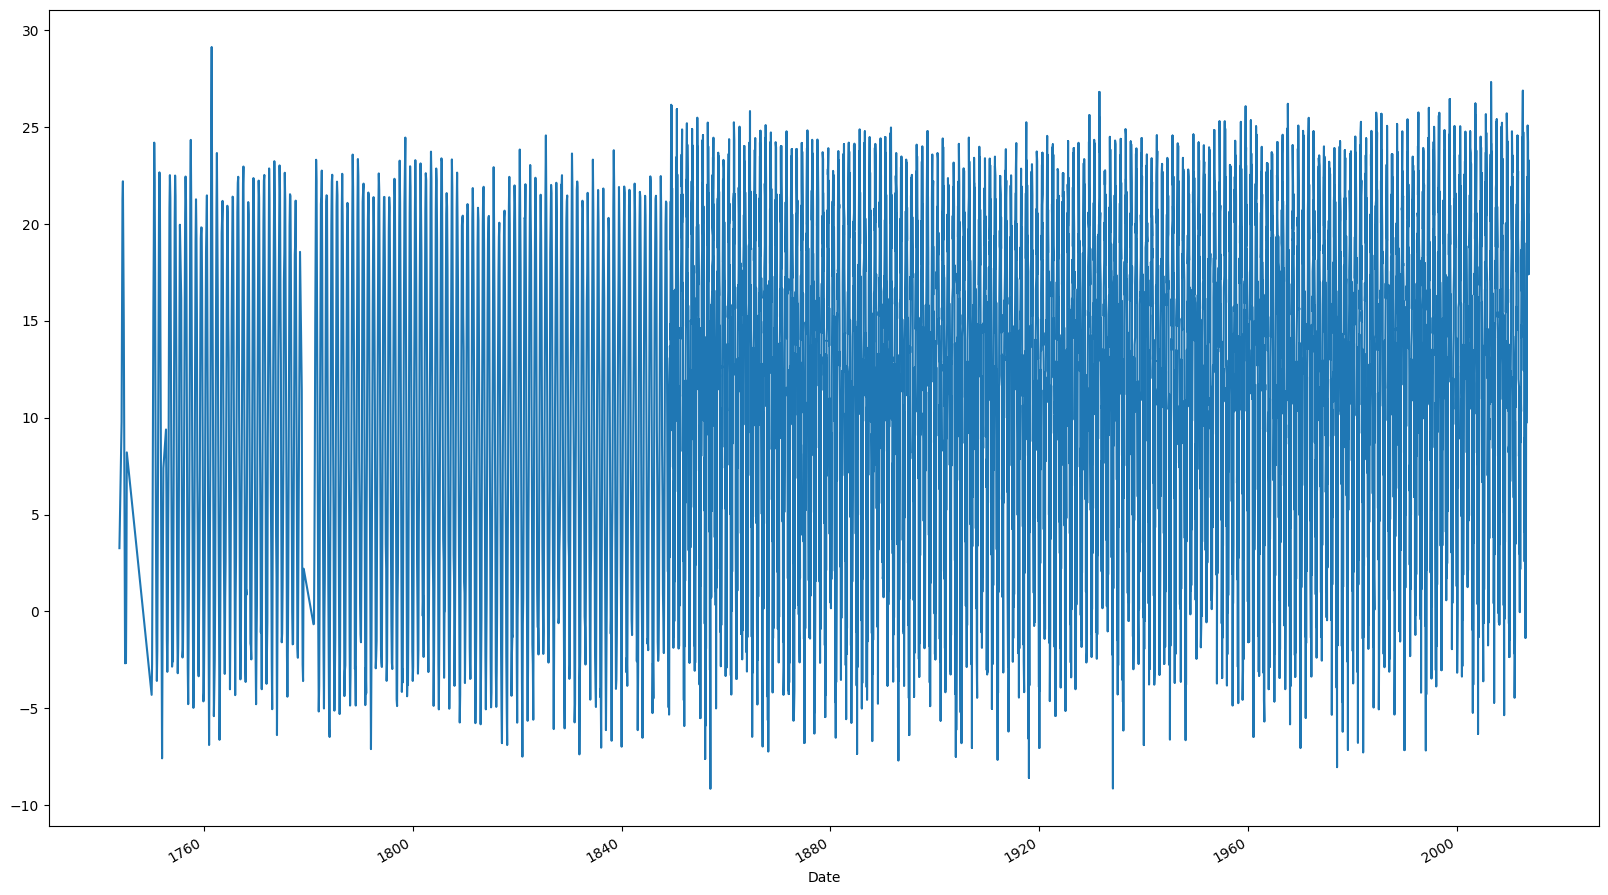

In [35]:
data2['Temp'].plot(figsize= (20,12))

In [36]:
from statsmodels.tsa.stattools import adfuller

####if p-vlaue < 0.05 we have to reject the null hypothesis

In [37]:
adfuller(data2['Temp'])

(-2.0063893036757476,
 0.28377865833334687,
 35,
 7037,
 {'1%': -3.431279613044704,
  '5%': -2.8619508146206374,
  '10%': -2.5669886726127307},
 28011.222669408726)

#### Null hypothesis is all about the assumption that the data is not stationary, rejecting it means the data is stationary

In [38]:
def adfuller_test(data):
  result = adfuller(data)

  labels = ['ADF test statistics', 'p-value', 'lags-used', 'num. of observations']

  for value, label in zip(result, labels):
    print(f"{label} : {str(value)}")

  if result[1] <= 0.05:
    print("reject the H0 , data is stationary")
  else:
    print("Fail to reject the H0 , data is not stationary")



In [39]:
adfuller_test(data2['Temp'])

ADF test statistics : -2.0063893036757476
p-value : 0.28377865833334687
lags-used : 35
num. of observations : 7037
Fail to reject the H0 , data is not stationary


#Problem Statement 5:
##How to make your data stationary

In [40]:
data2['Temp'].head(10)

Date
1849-01-01     8.819
1849-02-01     9.577
1849-03-01    11.814
1849-04-01    13.704
1849-05-01    14.834
1849-06-01    21.173
1849-07-01    26.159
1849-08-01    26.099
1849-09-01    21.848
1849-10-01    16.549
Name: Temp, dtype: float64

In [41]:
# data2['Temp'].shift(3).head(10)

###the curve in the earlier line plot had an yearly seaonality, in order to remove it we have to shift the values by 12.
###lets do shifting along with differencing

In [42]:
data2['first_temp_diff'] = data2['Temp'] - data2['Temp'].shift(12)

In [43]:
data2

,Temp,year,month,first_temp_diff
Date,,,,
1849-01-01,8.819,1849,1,NaN
1849-02-01,9.577,1849,2,NaN
1849-03-01,11.814,1849,3,NaN
1849-04-01,13.704,1849,4,NaN
1849-05-01,14.834,1849,5,NaN
...,...,...,...,...
2013-05-01,17.434,2013,5,0.879
2013-06-01,19.759,2013,6,1.277
2013-07-01,20.657,2013,7,1.025


In [44]:
adfuller_test(data2['first_temp_diff'].dropna())

ADF test statistics : -21.23965040491092
p-value : 0.0
lags-used : 35
num. of observations : 7025
reject the H0 , data is stationary


<Axes: xlabel='Date'>

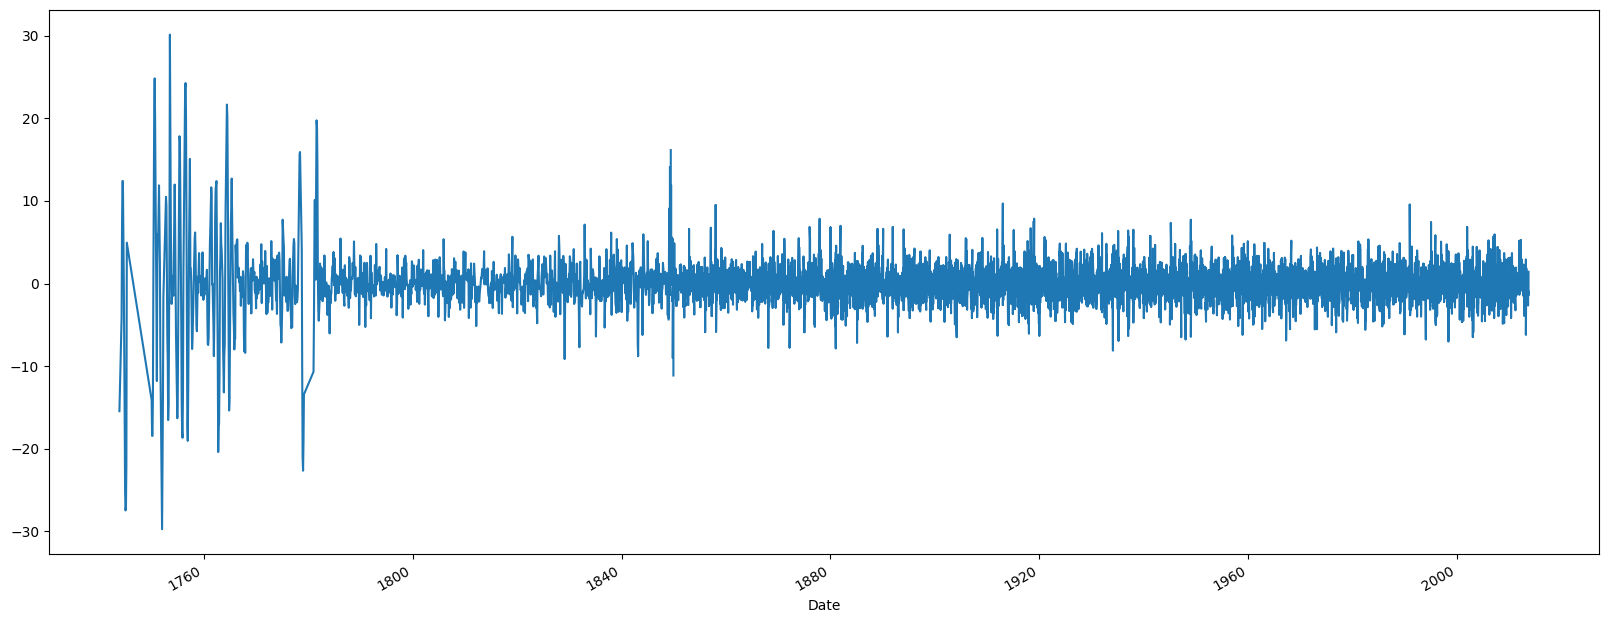

In [45]:
data2['first_temp_diff'].plot(figsize = (20,8))

#Problem Statement 6:
##Build time series model

In [46]:
#only first_temp_diff have stationary nature
df=data2[['first_temp_diff']]

In [47]:
df.dropna(inplace=True)

In [48]:
df.head(10)

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799
1850-06-01,-0.932
1850-07-01,-2.714
1850-08-01,-0.164
1850-09-01,0.714


In [49]:
# import warnings
# from warnings import filterwarnings
# filterwarnings('ignore')

In [50]:
df

,first_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799
...,...
2013-05-01,0.879
2013-06-01,1.277
2013-07-01,1.025


#### window is a - bussnies - period used in context of domains, mean is the aggregating function that is applied in order to end up getting output/forecasting or the predictions

In [51]:
df['first_temp_diff'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first_temp_diff, Length: 7061, dtype: float64

In [52]:
df['prediction'] = df['first_temp_diff'].rolling(window=5).mean()

In [53]:
df.head()

,first_temp_diff,prediction
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706


In [54]:
df.dropna(inplace=True)

In [55]:
df.head()

,first_temp_diff,prediction
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


In [56]:
df.columns = ['actual_temp', 'forecast_temp']

In [57]:
df.head(3)

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530


In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
# to get the actual error instead of the square error apply sqrt root
# results mean error of +-2.4 Celsius can happen in your prediction
# Note: if you have outliers in the data, the error might get increased
np.sqrt(mean_squared_error(df['actual_temp'], df['forecast_temp']))

2.3934235122562058

#Problem Statement 7:
##Building ARIMA model

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot

In [61]:
df.head()

,actual_temp,forecast_temp
Date,,
1850-05-01,1.799,-0.4706
1850-06-01,-0.932,-0.3106
1850-07-01,-2.714,-0.6530
1850-08-01,-0.164,-0.3960
1850-09-01,0.714,-0.2594


####the q = 3 because it touches the blue zone.
####that blue area is the confidence interval, by default this is said to be as CI = 95%, which says we are 95% confident that the mean of the entire data falls within this range.

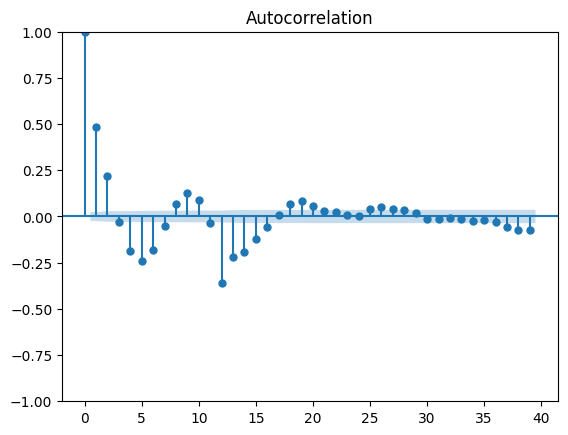

In [62]:
plot_acf(df['actual_temp'])
plt.show()  #q=3

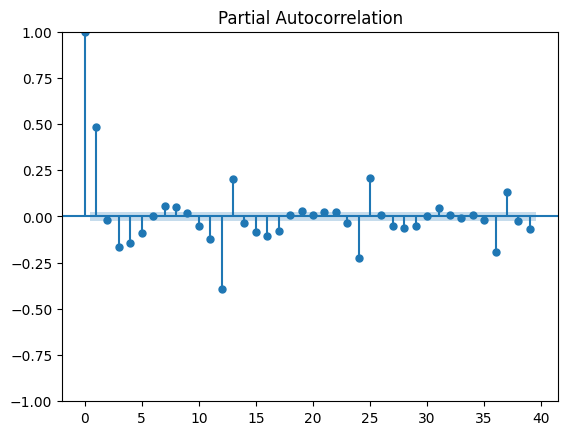

In [63]:
plot_pacf(df['actual_temp'])
plt.show()  #p=2

In [64]:
df = df[['actual_temp']]

In [65]:
df.head(2)

,actual_temp
Date,
1850-05-01,1.799
1850-06-01,-0.932


In [66]:
df.shape

(7057, 1)

In [67]:
train = df[:6000]
test = df[6000:]

In [68]:
train.shape

(6000, 1)

In [69]:
from statsmodels.tsa.arima.model import ARIMA

In [70]:
arima = ARIMA(train, order = (2,1,3))

In [71]:
model = arima.fit()

In [72]:
pred = model.forecast(steps = len(test))

In [73]:
len(pred)

1057

In [74]:
len(test)

1057

In [75]:
import numpy as np
np.sqrt(mean_squared_error(test,pred))

1.5124854321888621

#### Using MA error was = 2.39
####using ARIMA error is = 1.51

#Problem Statment 8:
##Model Tuning

In [76]:
p_value = range(0,4)
q_value = range(0,4)
d_value = range(0,3)

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming p_value, d_value, and q_value are lists containing values for p, d, and q parameters
for p in p_value:
    for d in d_value:
        for q in q_value:
            order = (p, d, q)
            train = df[:6000]
            test = df[6000:]

            predictions = []
            for i in range(len(test)):
                arima = ARIMA(train, order=order)
                model = arima.fit()
                pred_y = model.forecast() # forecast returns a tuple, extract the first element
                predictions.append(pred_y)

            error = mean_squared_error(test, predictions)
            print(f"MSE is {error} with order {order}")


MSE is 2.2890331442749794 with order (0, 0, 0)
